<a href="https://colab.research.google.com/github/JuanCaG8a/Repositorio-Metodos-1/blob/main/Tarea5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)


3)

Estimación de mu: 3.879473710783209
Estimación de sigma: 2.6654350016074786


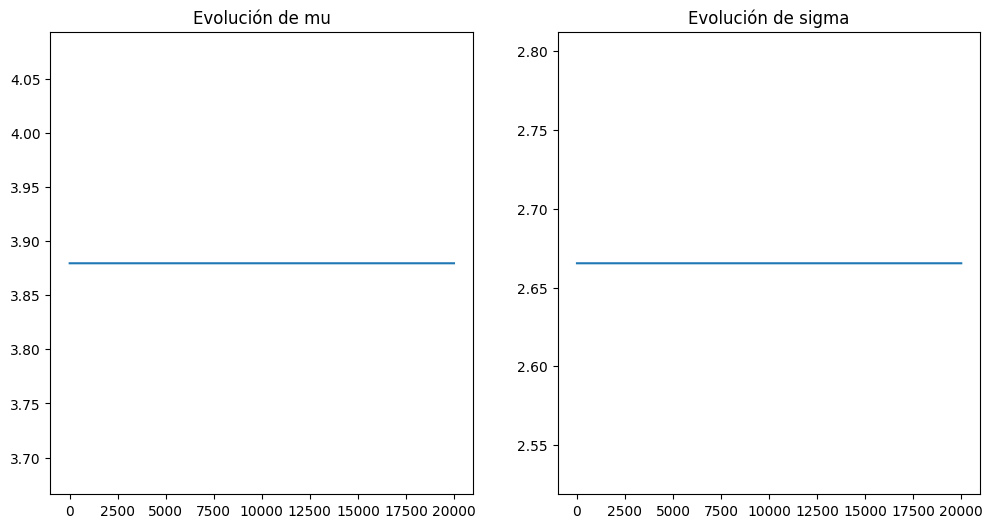

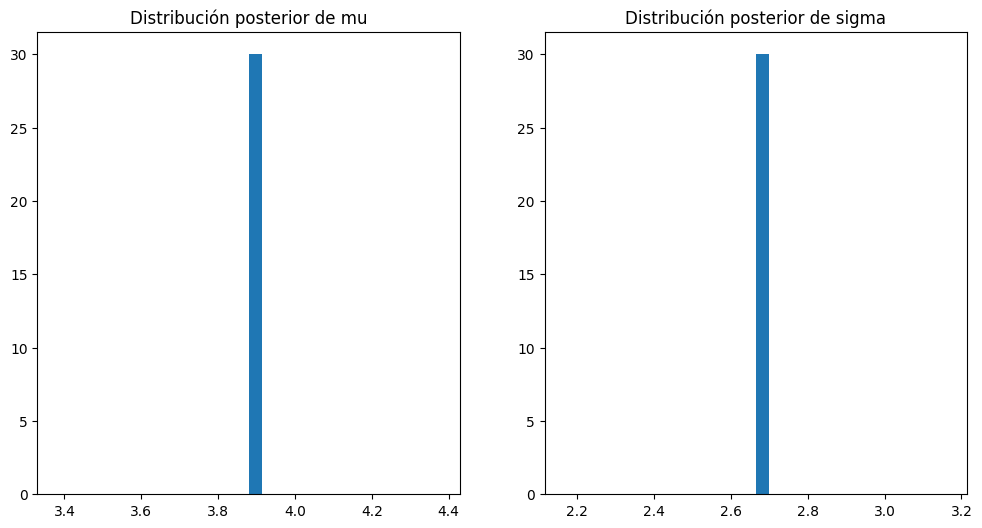

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Datos cargados
datos = np.genfromtxt('Gaussiano.csv', delimiter='.',skip_header=1)

# Definimos la función de Likelihood Gaussiana
def likelihood(mu, sigma, data):
    N = len(data)
    return np.prod((1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(data - mu)**2 / (2 * sigma**2)))

# Definimos la función de probabilidad a priori (uniforme)
def prior(mu, sigma):
    if 3 <= mu <= 5 and 0.5 <= sigma <= 3.5:
        return 1
    return 0

# Logaritmo de la distribución posterior (proporcional)
def log_posterior(mu, sigma, data):
    L = likelihood(mu, sigma, data)
    prior_prob = prior(mu, sigma)
    if L == 0 or prior_prob == 0:
        return -np.inf  # Evitar log(0)
    return np.log(L) + np.log(prior_prob)

# Algoritmo de Metropolis-Hastings
def metropolis_hastings(data, N=20000):
    # Valores iniciales
    mu_current = np.random.uniform(3, 5)
    sigma_current = np.random.uniform(0.5, 3.5)

    mu_values = [mu_current]
    sigma_values = [sigma_current]

    for i in range(N):
        # Nuevas propuestas para mu y sigma
        mu_proposal = np.random.normal(mu_current, 0.1)
        sigma_proposal = np.random.normal(sigma_current, 0.1)

        # Asegurarse de que sigma propuesta es positiva
        if sigma_proposal <= 0:
            sigma_proposal = sigma_current

        # Calculamos la log-posterior para el estado actual y la propuesta
        log_post_current = log_posterior(mu_current, sigma_current, data)
        log_post_proposal = log_posterior(mu_proposal, sigma_proposal, data)

        # Aceptar o rechazar la propuesta
        acceptance_ratio = np.exp(log_post_proposal - log_post_current)
        if np.random.rand() < acceptance_ratio:
            mu_current = mu_proposal
            sigma_current = sigma_proposal

        # Guardar los valores
        mu_values.append(mu_current)
        sigma_values.append(sigma_current)

    return np.array(mu_values), np.array(sigma_values)

# Ejecutar el algoritmo de Metropolis-Hastings
mu_samples, sigma_samples = metropolis_hastings(datos)

# Estimar el mejor valor de los parámetros (media de las muestras)
mu_estimate = np.mean(mu_samples)
sigma_estimate = np.mean(sigma_samples)

# Mostrar resultados
print(f"Estimación de mu: {mu_estimate}")
print(f"Estimación de sigma: {sigma_estimate}")

# Gráfico de las cadenas de Markov
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mu_samples)
plt.title("Evolución de mu")
plt.subplot(1, 2, 2)
plt.plot(sigma_samples)
plt.title("Evolución de sigma")
plt.show()

# Histograma de las distribuciones obtenidas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(mu_samples, bins=30, density=True)
plt.title("Distribución posterior de mu")
plt.subplot(1, 2, 2)
plt.hist(sigma_samples, bins=30, density=True)
plt.title("Distribución posterior de sigma")
plt.show()


6)

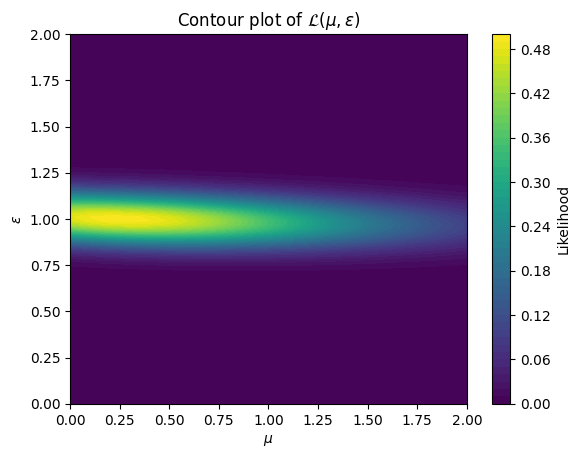

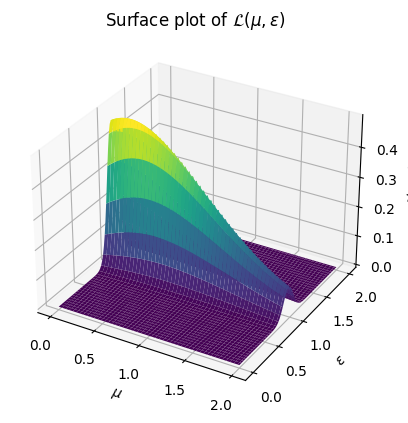

In [21]:
from scipy.stats import poisson, norm
from mpl_toolkits.mplot3d import Axes3D

# Parámetros iniciales
n = 10  # Número de eventos observados
b = 9   # Eventos de física conocida
s = 4   # Eventos de nueva física
epsilon_bar = 1  # Valor medio de eficiencia
sigma = 0.1  # Desviación estándar de la eficiencia

# Definir la función de verosimilitud
def likelihood(mu, epsilon):
    # Componente Poisson
    poisson_term = poisson.pmf(n, mu * s + epsilon * b)

    # Componente Gaussiana
    gauss_term = norm.pdf(epsilon, loc=epsilon_bar, scale=sigma)

    # Verosimilitud total
    return poisson_term * gauss_term

# Rango de valores para mu y epsilon
mu_vals = np.linspace(0, 2, 100)
epsilon_vals = np.linspace(0, 2, 100)

# Crear una grilla
MU, EPSILON = np.meshgrid(mu_vals, epsilon_vals)
L = likelihood(MU, EPSILON)

# Graficar el contorno (curvas de nivel)
plt.contourf(MU, EPSILON, L, levels=50, cmap='viridis')
plt.colorbar(label='Likelihood')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\epsilon$')
plt.title(r'Contour plot of $\mathcal{L}(\mu, \epsilon)$')
plt.show()

# Graficar la superficie 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(MU, EPSILON, L, cmap='viridis')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\epsilon$')
ax.set_zlabel(r'$\mathcal{L}(\mu, \epsilon)$')
plt.title(r'Surface plot of $\mathcal{L}(\mu, \epsilon)$')
plt.show()



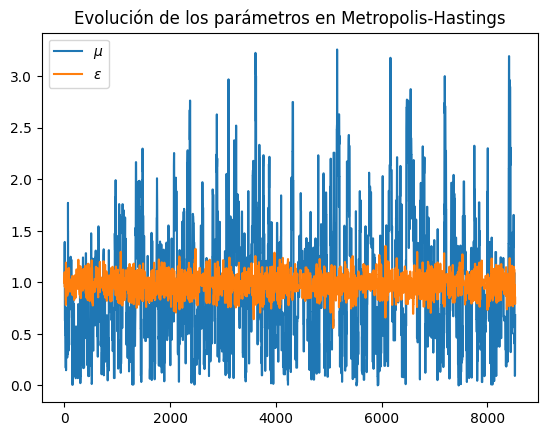

Estimación de mu: 0.956 ± 0.603
Estimación de epsilon: 0.991 ± 0.097


In [4]:
def metropolis_hastings(likelihood_fn, initial_values, steps=10000, proposal_width=0.5):
    mu_current, epsilon_current = initial_values
    chain_mu = [mu_current]
    chain_epsilon = [epsilon_current]

    for _ in range(steps):
        # Proponer nuevos valores
        mu_proposed = np.random.normal(mu_current, proposal_width)
        epsilon_proposed = np.random.normal(epsilon_current, proposal_width)

        # Asegurarnos de que los valores propuestos estén dentro del rango permitido
        if mu_proposed < 0 or epsilon_proposed < 0:
            continue

        # Evaluar la verosimilitud para los valores actuales y propuestos
        likelihood_current = likelihood_fn(mu_current, epsilon_current)
        likelihood_proposed = likelihood_fn(mu_proposed, epsilon_proposed)

        # Calcular la aceptación
        acceptance_ratio = min(1, likelihood_proposed / likelihood_current)

        # Aceptar o rechazar
        if np.random.rand() < acceptance_ratio:
            mu_current = mu_proposed
            epsilon_current = epsilon_proposed

        chain_mu.append(mu_current)
        chain_epsilon.append(epsilon_current)

    return np.array(chain_mu), np.array(chain_epsilon)

# Estimar los parámetros utilizando Metropolis-Hastings
initial_mu = 1.0  # Estimación inicial de mu
initial_epsilon = 1.0  # Estimación inicial de epsilon
chain_mu, chain_epsilon = metropolis_hastings(likelihood, (initial_mu, initial_epsilon))

# Graficar las cadenas de mu y epsilon
plt.figure()
plt.plot(chain_mu, label=r'$\mu$')
plt.plot(chain_epsilon, label=r'$\epsilon$')
plt.legend()
plt.title('Evolución de los parámetros en Metropolis-Hastings')
plt.show()

# Calcular los valores estimados y los errores
mu_est = np.mean(chain_mu)
epsilon_est = np.mean(chain_epsilon)
mu_err = np.std(chain_mu)
epsilon_err = np.std(chain_epsilon)

print(f"Estimación de mu: {mu_est:.3f} ± {mu_err:.3f}")
print(f"Estimación de epsilon: {epsilon_est:.3f} ± {epsilon_err:.3f}")

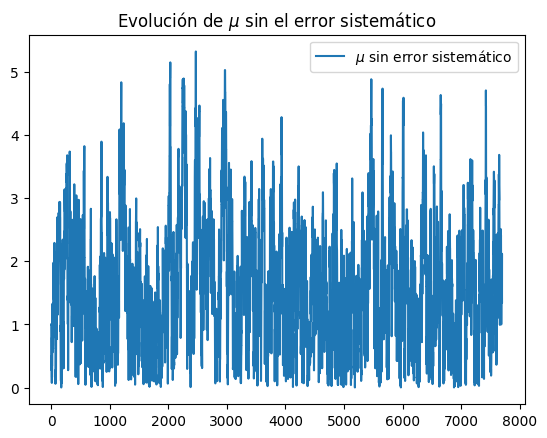

Estimación de mu sin error sistemático: 1.587 ± 0.998


In [5]:
# Nueva función de verosimilitud sin la parte gaussiana
def likelihood_no_gauss(mu, epsilon):
    # Solo la parte de Poisson
    poisson_term = poisson.pmf(n, mu * s + epsilon * b)
    return poisson_term

# Usar Metropolis-Hastings para estimar mu sin el error sistemático
chain_mu_no_gauss, chain_epsilon_no_gauss = metropolis_hastings(likelihood_no_gauss, (initial_mu, initial_epsilon))

# Graficar la cadena de mu
plt.figure()
plt.plot(chain_mu_no_gauss, label=r'$\mu$ sin error sistemático')
plt.legend()
plt.title('Evolución de $\mu$ sin el error sistemático')
plt.show()

# Calcular la estimación de mu sin el error sistemático
mu_est_no_gauss = np.mean(chain_mu_no_gauss)
mu_err_no_gauss = np.std(chain_mu_no_gauss)

print(f"Estimación de mu sin error sistemático: {mu_est_no_gauss:.3f} ± {mu_err_no_gauss:.3f}")
